## OikoLab - Data from 1980 onwards on:
- Temperature
- Wind
- Radiation
- Pressure, Humidity and Precipitation

Specific parameters can be found here - https://docs.oikolab.com/#3-weather-parameters

In [47]:
import requests
import os
import json

In [4]:
cities = {"Dakar" : (14.6937, -17.44406),
          "Pikine" : (14.76457, -17.39071),
          "Touba" : (14.85, -15.88333),
          "Kaolack" : (14.15197, -16.07259),
          "Thiès" : (14.78944, -16.92602),
          "Ziguinchor" : (12.56801, -16.27326),
          "Thiès Nones" : (14.78333, -16.96667),
          "Tiébo" : (14.63333, -16.23333),
          "Kolda" : (12.8939, -14.94125),
          "Saint-Louis" : (16.01793, -16.48962),
          "Bignona" : (12.81028, -16.22639),
          "Matam" : (15.65587, -13.25544),
          "Koungheul" : (13.98333, -14.8),
          "Tambacounda" : (13.77073, -13.66734),
          "Mbaké" : (14.79032, -15.90803),
          "Louga" : (15.61867, -16.22436),
          "Richard-Toll" : (16.4625, -15.70083),
          "Joal-Fadiout" : (14.16667, -16.83333),
          "N’diareme limamoulaye" : (14.78148, -17.3841),
          "Dara" : (15.34844, -15.47993)}

#Add more as needed

In [9]:
#A file containing your api key obtained from the website - https://oikolab.com/
with open("keyfile.txt") as f:
    api_key = f.readlines()[0].rstrip()

In [53]:
response = requests.get("https://api.oikolab.com/weather",      
                        params={"param":'temperature', 
                                "start":'2019-01-01T00:00:00', 
                                "end":'2020-01-01T00:00:00',
                                "freq":'D', 
                                "lat":cities["Dakar"][0], 
                                "lon":cities["Dakar"][1],
                                "api-key":api_key})


"""
All param values :
        'temperature',                                    degrees celsius
        'dewpoint_temperature',                           
        'wetbulb_temperature', 
        'relative_humidity',                              from 0 to 1 (no unit)
        'humidex', 
        'urban_temperature', 
        'surface_solar_radiation',                        Watts/metre squared
        'surface_thermal_radiation',
        'surface_direct_solar_radiation',
        'direct_normal_solar_radiation',
        'surface_diffuse_solar_radiation',
        'wind_speed',                                     metres/second
        'wind_direction', 
        'surface_pressure',                               Pascals
        'total_cloud_cover',                              0 to 1
        'soil_temperature_level_1', 
        'soil_temperature_level_2', 
        'soil_temperature_level_3',
        'soil_temperature_level_4',
        'sea_surface_temperature',
        'skin_temperature',
        'total_precipitation',                            millimeters
        'snowfall'                                        millimeters
"""

"\nAll param values :\n        'temperature',                                    degrees celsius\n        'dewpoint_temperature',                           \n        'wetbulb_temperature', \n        'relative_humidity',                              from 0 to 1 (no unit)\n        'humidex', \n        'urban_temperature', \n        'surface_solar_radiation',                        Watts/metre squared\n        'surface_thermal_radiation',\n        'surface_direct_solar_radiation',\n        'direct_normal_solar_radiation',\n        'surface_diffuse_solar_radiation',\n        'wind_speed',                                     metres/second\n        'wind_direction', \n        'surface_pressure',                               Pascals\n        'total_cloud_cover',                              0 to 1\n        'soil_temperature_level_1', \n        'soil_temperature_level_2', \n        'soil_temperature_level_3',\n        'soil_temperature_level_4',\n        'sea_surface_temperature',\n        's

In [54]:
resp_data = response.json()
resp_data

{'attributes': {'lat': 14.6937,
  'lon': -17.44406,
  'utc_offset': -1.0,
  'processing_time': 0.186,
  'n_parameter_months': 12,
  'gfs_reference_time': '2020-12-08 12:00:00Z',
  'next_gfs_update': 'in 4.4 hours (approx)',
  'source': 'ERA5 from Copernicus Climate Data Store (CDS) (2020) and GFS from National Centers for Environmental Prediction (NCEP)',
  'notes': 'GFS forecast data is updated every 6 hours and ERA5/ERA5T reanalysis data is updated every 24 hours to the most recent data available.'},
 'data': '{"columns":["temperature (degC)"],"index":[1546300800,1546387200,1546473600,1546560000,1546646400,1546732800,1546819200,1546905600,1546992000,1547078400,1547164800,1547251200,1547337600,1547424000,1547510400,1547596800,1547683200,1547769600,1547856000,1547942400,1548028800,1548115200,1548201600,1548288000,1548374400,1548460800,1548547200,1548633600,1548720000,1548806400,1548892800,1548979200,1549065600,1549152000,1549238400,1549324800,1549411200,1549497600,1549584000,1549670400

In [60]:
data = resp_data["data"] #this is a string, convert to json data
temp_data = json.loads(data)
values = temp_data["data"]

In [61]:
len(values) #around one year data

#now can be converted to numpy array/tensor

366

## Interpret the CHIRPS, eMODIS NDVI, and NMME seasonal forecast data
https://climateserv.readthedocs.io/en/latest/api.html


https://github.com/SERVIR/ClimateSERVpy/blob/master/climateserv/api.py

https://readthedocs.org/projects/climateserv/downloads/pdf/latest/

In [65]:
!pip install climateserv

#This is an API wrapper which would allow easy access to the climateserv API

#Code can be found here - https://github.com/servir/ClimateSERVpy

In [84]:
import climateserv.api as clim_api

x = 81.27   
y = 29.19

GeometryCoords = [[cities["Dakar"][0], cities["Dakar"][1]]]
                  
DatasetType = 'Seasonal_Forecast'
OperationType = 'Average' #Use download here to download the TIF files
EarliestDate = '01/12/2018'
LatestDate = '01/12/2019'
SeasonalEnsemble = 'ens07'
SeasonalVariable = 'Precipitation'
Outfile = 'out.csv'

clim_api.request_data(DatasetType, OperationType, 
             EarliestDate, LatestDate,GeometryCoords, 
             SeasonalEnsemble, SeasonalVariable,Outfile)

New Script Run
About to process scripted job item now.
https://climateserv.servirglobal.net/chirps/submitDataRequest?a=1&cmd=submitDataRequest&datatype=19&intervaltype=0&operationtype=5&begintime=01/12/2018&endtime=01/12/2019&geometry=%7B%22type%22%3A%22Polygon%22%2C%22coordinates%22%3A%5B%5B%5B14.6937%2C-17.44406%5D%5D%5D%7D
New Job Submitted to the Server: New JobID: b4db8bab-16d2-40a7-be94-b88b7adb4c3a
Current Job Progress: 100.  JobID: b4db8bab-16d2-40a7-be94-b88b7adb4c3a
Result of Job Status Cycle: complete
Job, b4db8bab-16d2-40a7-be94-b88b7adb4c3a is done, did it succeed? : True
Attempting to write CSV Data to: out.csv
CSV Data Written to: out.csv
Exiting...



In [77]:
import rasterio

In [71]:
image_file = 'Precip2018/2018-1-17.tif' #test2 in code.earthengine.com

satdat = rasterio.open(image_file)


In [73]:
print(satdat.count)
precip = satdat.read(1)

1


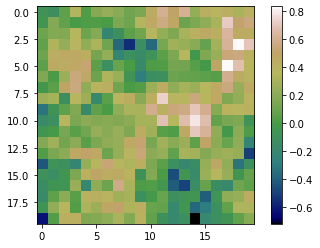

In [74]:
from matplotlib import pyplot as plt

fig = plt.imshow(precip)
fig.set_cmap('gist_earth')
plt.colorbar()

# Display the results.
plt.show()